<a href="https://colab.research.google.com/github/Hemesh0204/Prediction-using-Supervised-ML/blob/main/Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1- Prediction using Supervised ML



### Batch: GRIPAUGUST21

### Author: Hemesh

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("study-dataset.txt")

In [ ]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data cleaning

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization

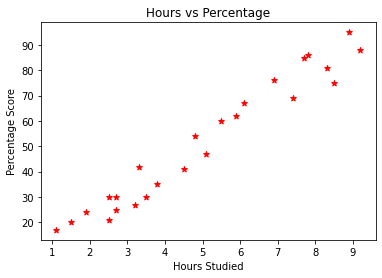

In [ ]:
plt.scatter(df.Hours,df.Scores,color='r',marker= "*")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score'); 

## Training the model

In [ ]:
## Splitting the data

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [ ]:
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(train_X, train_y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

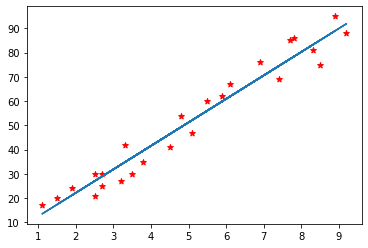

In [ ]:
line  = reg.coef_*X +reg.intercept_
plt.scatter(df["Hours"],df["Scores"],color='red',marker='*')
plt.plot(df["Hours"],line)

In [ ]:
y_predicted = reg.predict(val_X)
y_predicted

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [ ]:
val_y

array([81, 30, 21, 76, 62])

In [ ]:
df1 = pd.DataFrame({"Actual":val_y,"Predicted":y_predicted})
df1

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [ ]:
from sklearn.metrics import  mean_absolute_error
mean_absolute_error(y_predicted,val_y)

3.9207511902099244

In [ ]:
ans  = reg.predict([[9.25]])

print("For 9.25 hrs of study the predicted score is {}".format(round(*ans,2)))

For 9.25 hrs of study the predicted score is 92.39


In [ ]:
reg.score(val_X,val_y)

0.9678055545167994

#Conclusion

We can say that if a student studied for 9.25 hours/day then the student will score 92.39